In [167]:
import pygmt
import pandas as pd
import numpy as np
from obspy.clients.fdsn import Client
from obspy.core.utcdatetime import UTCDateTime
import datetime



In [179]:
# Load the catalogs 
matched_events_mycatalog= pd.read_csv('../data/matched_events_with_morton_mycatalog.csv')
unmatched_events_mycatalog= pd.read_csv('../data/new_events.csv')
unmatched_events_morton= pd.read_csv('../data/missing_events_from_mycatalog_morton.csv')
matched_events_morton= pd.read_csv('../data/matched_events_with_mycatalog_morton.csv')


In [180]:
# USGS catalog
client = Client("USGS")
# client_waveforms = WaveformClient()
events_USGS = client.get_events(starttime = UTCDateTime("2012-10-01T00:00:00.000000"),
                  endtime   = UTCDateTime("2012-10-31T23:59:59.999999"),
                  minlatitude=40,minlongitude=-127,maxlatitude=50,maxlongitude=-123)
events_USGS

88 Event(s) in Catalog:
2012-10-31T15:29:52.780000Z | +40.974, -123.700 | 3.21 mw | manual
2012-10-29T16:13:12.370000Z | +48.249, -123.156 | 0.57 md | manual
...
2012-10-02T02:56:59.840000Z | +40.329, -125.431 | 2.78 md | manual
2012-10-02T02:37:36.170000Z | +40.324, -125.394 | 2.79 md | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [181]:
len(matched_events_morton),len(matched_events_mycatalog)

(88, 88)

In [182]:
# Print matched_events_mycatalog
matched_events_mycatalog

Unnamed: 0.1  Unnamed: 0  idx                              time  \
0              0           0    0  2012-10-01 04:32:56.903568+00:00   
1            229         229   12  2012-10-01 23:30:57.209508+00:00   
2            442         442   19  2012-10-02 04:25:45.216012+00:00   
3            523         523   21  2012-10-02 05:16:27.348538+00:00   
4            575         575   22  2012-10-02 06:17:18.202105+00:00   
..           ...         ...  ...                               ...   
83         13033       13033  786  2012-10-28 02:41:20.589950+00:00   
84         13567       13567  821  2012-10-30 01:39:09.438525+00:00   
85         14028       14028  849  2012-10-31 04:38:05.441038+00:00   
86         14195       14195  861  2012-10-31 15:29:52.993244+00:00   
87         14235       14235  862  2012-10-31 16:13:42.061144+00:00   

             x           y          z  picks   latitude   longitude  \
0   -36.801756 -193.135290  37.890625     22  40.760255 -125.935836   
1    59.644226 -209.906467  37.890625     26  40.607902 -124.795253   
2    28.341582 -206.094836  41.015625     50  40.643890 -125.164939   
3    80.794660 -212.193445  44.921875     52  40.585515 -124.545664   
4     8.037165 -227.439970  39.453125     35  40.452117 -125.405253   
..         ...         ...        ...    ...        ...         ...   
83   38.493791 -238.874863  19.921875     11  40.348291 -125.046911   
84  122.249512 -175.601787  33.984375     25  40.909836 -124.048985   
85   32.571669 -235.825558  49.609375     14  40.376003 -125.116460   
86  134.939773 -162.642241  49.609375     40  41.024494 -123.895591   
87   74.872539 -213.718098  48.828125     28  40.572343 -124.615788   

        depth  event_idx  pick_idx  residual station phase     time_pick  \
0   37.890625          0    153772  0.746800   FS01B     P  1.349066e+09   
1   37.890625         12    153845  0.346685   FS01B     P  1.349134e+09   
2   41.015625         19    166429 -0.057739   FS01B     P  1.349152e+09   
3   44.921875         21    166436  0.208974   FS01B     P  1.349155e+09   
4   39.453125         22    166440 -0.408956   FS01B     P  1.349159e+09   
..        ...        ...       ...       ...     ...   ...           ...   
83  19.921875        786    246816 -0.668080   FS01B     P  1.351392e+09   
84  33.984375        821    301864 -1.312333   FS01B     P  1.351561e+09   
85  49.609375        849    152894 -0.536817   FS01B     P  1.351658e+09   
86  49.609375        861    215028  0.125086     DBO     P  1.351697e+09   
87  48.828125        862    152941 -0.134327   FS01B     P  1.351700e+09   

                            datetime  
0   2012-10-01 04:32:56.903568+00:00  
1   2012-10-01 23:30:57.209508+00:00  
2   2012-10-02 04:25:45.216012+00:00  
3   2012-10-02 05:16:27.348538+00:00  
4   2012-10-02 06:17:18.202105+00:00  
..                               ...  
83  2012-10-28 02:41:20.589950+00:00  
84  2012-10-30 01:39:09.438525+00:00  
85  2012-10-31 04:38:05.441038+00:00  
86  2012-10-31 15:29:52.993244+00:00  
87  2012-10-31 16:13:42.061144+00:00  

[88 rows x 18 columns]

In [183]:
matched_events_morton

Unnamed: 0  CI YEAR       TSTRING    YEAR  MONTH   DAY  HOUR  MINUTE  \
0          630      2.0  2.012100e+13  2012.0   10.0   1.0   4.0    32.0   
1          631      2.0  2.012100e+13  2012.0   10.0   1.0  23.0    30.0   
2          632      2.0  2.012100e+13  2012.0   10.0   2.0   4.0    25.0   
3          633      2.0  2.012100e+13  2012.0   10.0   2.0   5.0    16.0   
4          634      2.0  2.012100e+13  2012.0   10.0   2.0   6.0    17.0   
..         ...      ...           ...     ...    ...   ...   ...     ...   
83         716      2.0  2.012103e+13  2012.0   10.0  28.0   2.0    41.0   
84         717      2.0  2.012103e+13  2012.0   10.0  30.0   1.0    39.0   
85         718      2.0  2.012103e+13  2012.0   10.0  31.0   4.0    38.0   
86         719      2.0  2.012103e+13  2012.0   10.0  31.0  15.0    29.0   
87         720      2.0  2.012103e+13  2012.0   10.0  31.0  16.0    13.0   

    SECOND      LAT  ...  dist to nearest stn  tt RMS  ERH   ERZ  STRIKE  \
0    57.05  40.7190  ...                 34.0    0.46  2.6  29.2     NaN   
1    58.38  40.5787  ...                 11.8    0.34  6.9   5.8     NaN   
2    46.37  40.5592  ...                 24.1    0.30  1.7   5.0     NaN   
3    28.35  40.5075  ...                  7.3    0.35  1.1   1.2     NaN   
4    18.88  40.4213  ...                 31.2    0.46  1.4  34.8  316.59   
..     ...      ...  ...                  ...     ...  ...   ...     ...   
83   18.94  40.3640  ...                  3.8    0.11  1.4   1.1     NaN   
84   10.08  40.8998  ...                  9.6    0.22  1.7   1.2     NaN   
85    7.30  40.3762  ...                  8.7    0.12  1.7   0.5     NaN   
86   52.65  41.0058  ...                 15.3    0.06  0.6   0.9     NaN   
87   44.48  40.5008  ...                  6.9    0.11  1.0   1.2     NaN   

      DIP   RAKE  PLATE DESIGNATION  TEMPLATE EVENT?  \
0     NaN    NaN  Seaward of Trench              NaN   
1     NaN    NaN               Slab              NaN   
2     NaN    NaN  Seaward of Trench              NaN   
3     NaN    NaN               Slab              NaN   
4   43.54 -85.95  Seaward of Trench              NaN   
..    ...    ...                ...              ...   
83    NaN    NaN  Seaward of Trench              NaN   
84    NaN    NaN               Slab              NaN   
85    NaN    NaN  Seaward of Trench              NaN   
86    NaN    NaN        Upper Plate          Catalog   
87    NaN    NaN               Slab              NaN   

                     datetime  
0   2012-10-01 04:32:57+00:00  
1   2012-10-01 23:30:58+00:00  
2   2012-10-02 04:25:46+00:00  
3   2012-10-02 05:16:28+00:00  
4   2012-10-02 06:17:18+00:00  
..                        ...  
83  2012-10-28 02:41:18+00:00  
84  2012-10-30 01:39:10+00:00  
85  2012-10-31 04:38:07+00:00  
86  2012-10-31 15:29:52+00:00  
87  2012-10-31 16:13:44+00:00  

[88 rows x 25 columns]

In [184]:
# Print unmatched_events_mycatalog
unmatched_events_mycatalog

Unnamed: 0.1  Unnamed: 0  idx                              time  \
0              22          22    1  2012-10-01 06:49:32.698471+00:00   
1              37          37    2  2012-10-01 06:55:58.767739+00:00   
2              47          47    3  2012-10-01 07:27:43.380922+00:00   
3              73          73    4  2012-10-01 11:20:38.336797+00:00   
4              88          88    5  2012-10-01 12:32:08.005017+00:00   
..            ...         ...  ...                               ...   
867         14327       14327  868  2012-10-31 22:15:09.089358+00:00   
868         14339       14339  869  2012-10-31 22:39:33.568856+00:00   
869         14350       14350  870  2012-10-31 23:36:24.516781+00:00   
870         14378       14378  871  2012-10-31 23:52:20.161582+00:00   
871             0           0    0  2012-10-01 04:32:56.903568+00:00   

             x           y          z  picks   latitude   longitude  \
0    57.952191 -219.816708  30.078125     15  40.518783 -124.816153   
1    79.102626 -257.933019  27.734375     10  40.173820 -124.571321   
2    71.488469 -228.964622  39.453125     26  40.435356 -124.657468   
3    25.803530 -206.857162  37.109375     15  40.637109 -125.194976   
4    92.638904 -222.103686  48.828125     41  40.495045 -124.407236   
..         ...         ...        ...    ...        ...         ...   
867  25.803530 -183.987375  49.609375     12  40.843049 -125.194034   
868  37.647774 -200.758552  45.703125     11  40.691571 -125.054603   
869 -43.569895 -220.579034  43.359375     28  40.512798 -126.014088   
870  48.646000 -210.668793  31.640625     10  40.601757 -124.925258   
871 -36.801756 -193.135290  37.890625     22  40.760255 -125.935836   

         depth  event_idx  pick_idx  residual station phase     time_pick  \
0    30.078125          1     86563  0.324542   BB030     P  1.349074e+09   
1    27.734375          2    153785 -0.808124   FS01B     P  1.349075e+09   
2    39.453125          3    153787 -0.058257   FS01B     P  1.349076e+09   
3    37.109375          4    153796 -0.204703   FS01B     P  1.349090e+09   
4    48.828125          5    153797 -0.342851   FS01B     P  1.349095e+09   
..         ...        ...       ...       ...     ...   ...           ...   
867  49.609375        868    345220  0.531000   FS09B     P  1.351722e+09   
868  45.703125        869    228470  0.720509   FS02B     P  1.351723e+09   
869  43.359375        870    152971 -0.127825   FS01B     P  1.351727e+09   
870  31.640625        871    152973  1.034315   FS01B     P  1.351728e+09   
871  37.890625          0    153772  0.746800   FS01B     P  1.349066e+09   

                             datetime  
0    2012-10-01 06:49:32.698471+00:00  
1    2012-10-01 06:55:58.767739+00:00  
2    2012-10-01 07:27:43.380922+00:00  
3    2012-10-01 11:20:38.336797+00:00  
4    2012-10-01 12:32:08.005017+00:00  
..                                ...  
867  2012-10-31 22:15:09.089358+00:00  
868  2012-10-31 22:39:33.568856+00:00  
869  2012-10-31 23:36:24.516781+00:00  
870  2012-10-31 23:52:20.161582+00:00  
871  2012-10-01 04:32:56.903568+00:00  

[872 rows x 18 columns]

In [185]:
# Print unmatched_events_morton
unmatched_events_morton

Unnamed: 0  CI YEAR       TSTRING    YEAR  MONTH  DAY  HOUR  MINUTE  \
0         638      2.0  2.012100e+13  2012.0   10.0  3.0   3.0    25.0   
1         642      2.0  2.012100e+13  2012.0   10.0  4.0   4.0    51.0   
2         644      2.0  2.012100e+13  2012.0   10.0  4.0   5.0    34.0   

   SECOND      LAT  ...  dist to nearest stn  tt RMS  ERH   ERZ  STRIKE  DIP  \
0   15.61  44.5047  ...                 16.9    0.30  8.1   5.4     NaN  NaN   
1   41.52  44.5288  ...                 30.5    0.17  5.4  17.8     NaN  NaN   
2   57.35  44.5475  ...                 30.2    0.19  5.5  17.0     NaN  NaN   

   RAKE  PLATE DESIGNATION  TEMPLATE EVENT?                   datetime  
0   NaN          Interface              NaN  2012-10-03 03:25:15+00:00  
1   NaN        Upper Plate              NaN  2012-10-04 04:51:41+00:00  
2   NaN        Upper Plate              NaN  2012-10-04 05:34:57+00:00  

[3 rows x 25 columns]

/tmp/ipykernel_1678616/4252372934.py:10: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=unmatched_events_mycatalog['longitude'], y=unmatched_events_mycatalog['latitude'],
/tmp/ipykernel_1678616/4252372934.py:12: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=matched_events_mycatalog['longitude'], y=matched_events_mycatalog['latitude'],
/tmp/ipykernel_1678616/4252372934.py:14: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=matched_events_morton['LON'], y=matched_events_morton['LAT'],
/tmp/ipykernel_1678616/4252372934.py:16: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=unmatched_events_morton['LON'], y=unmatched_

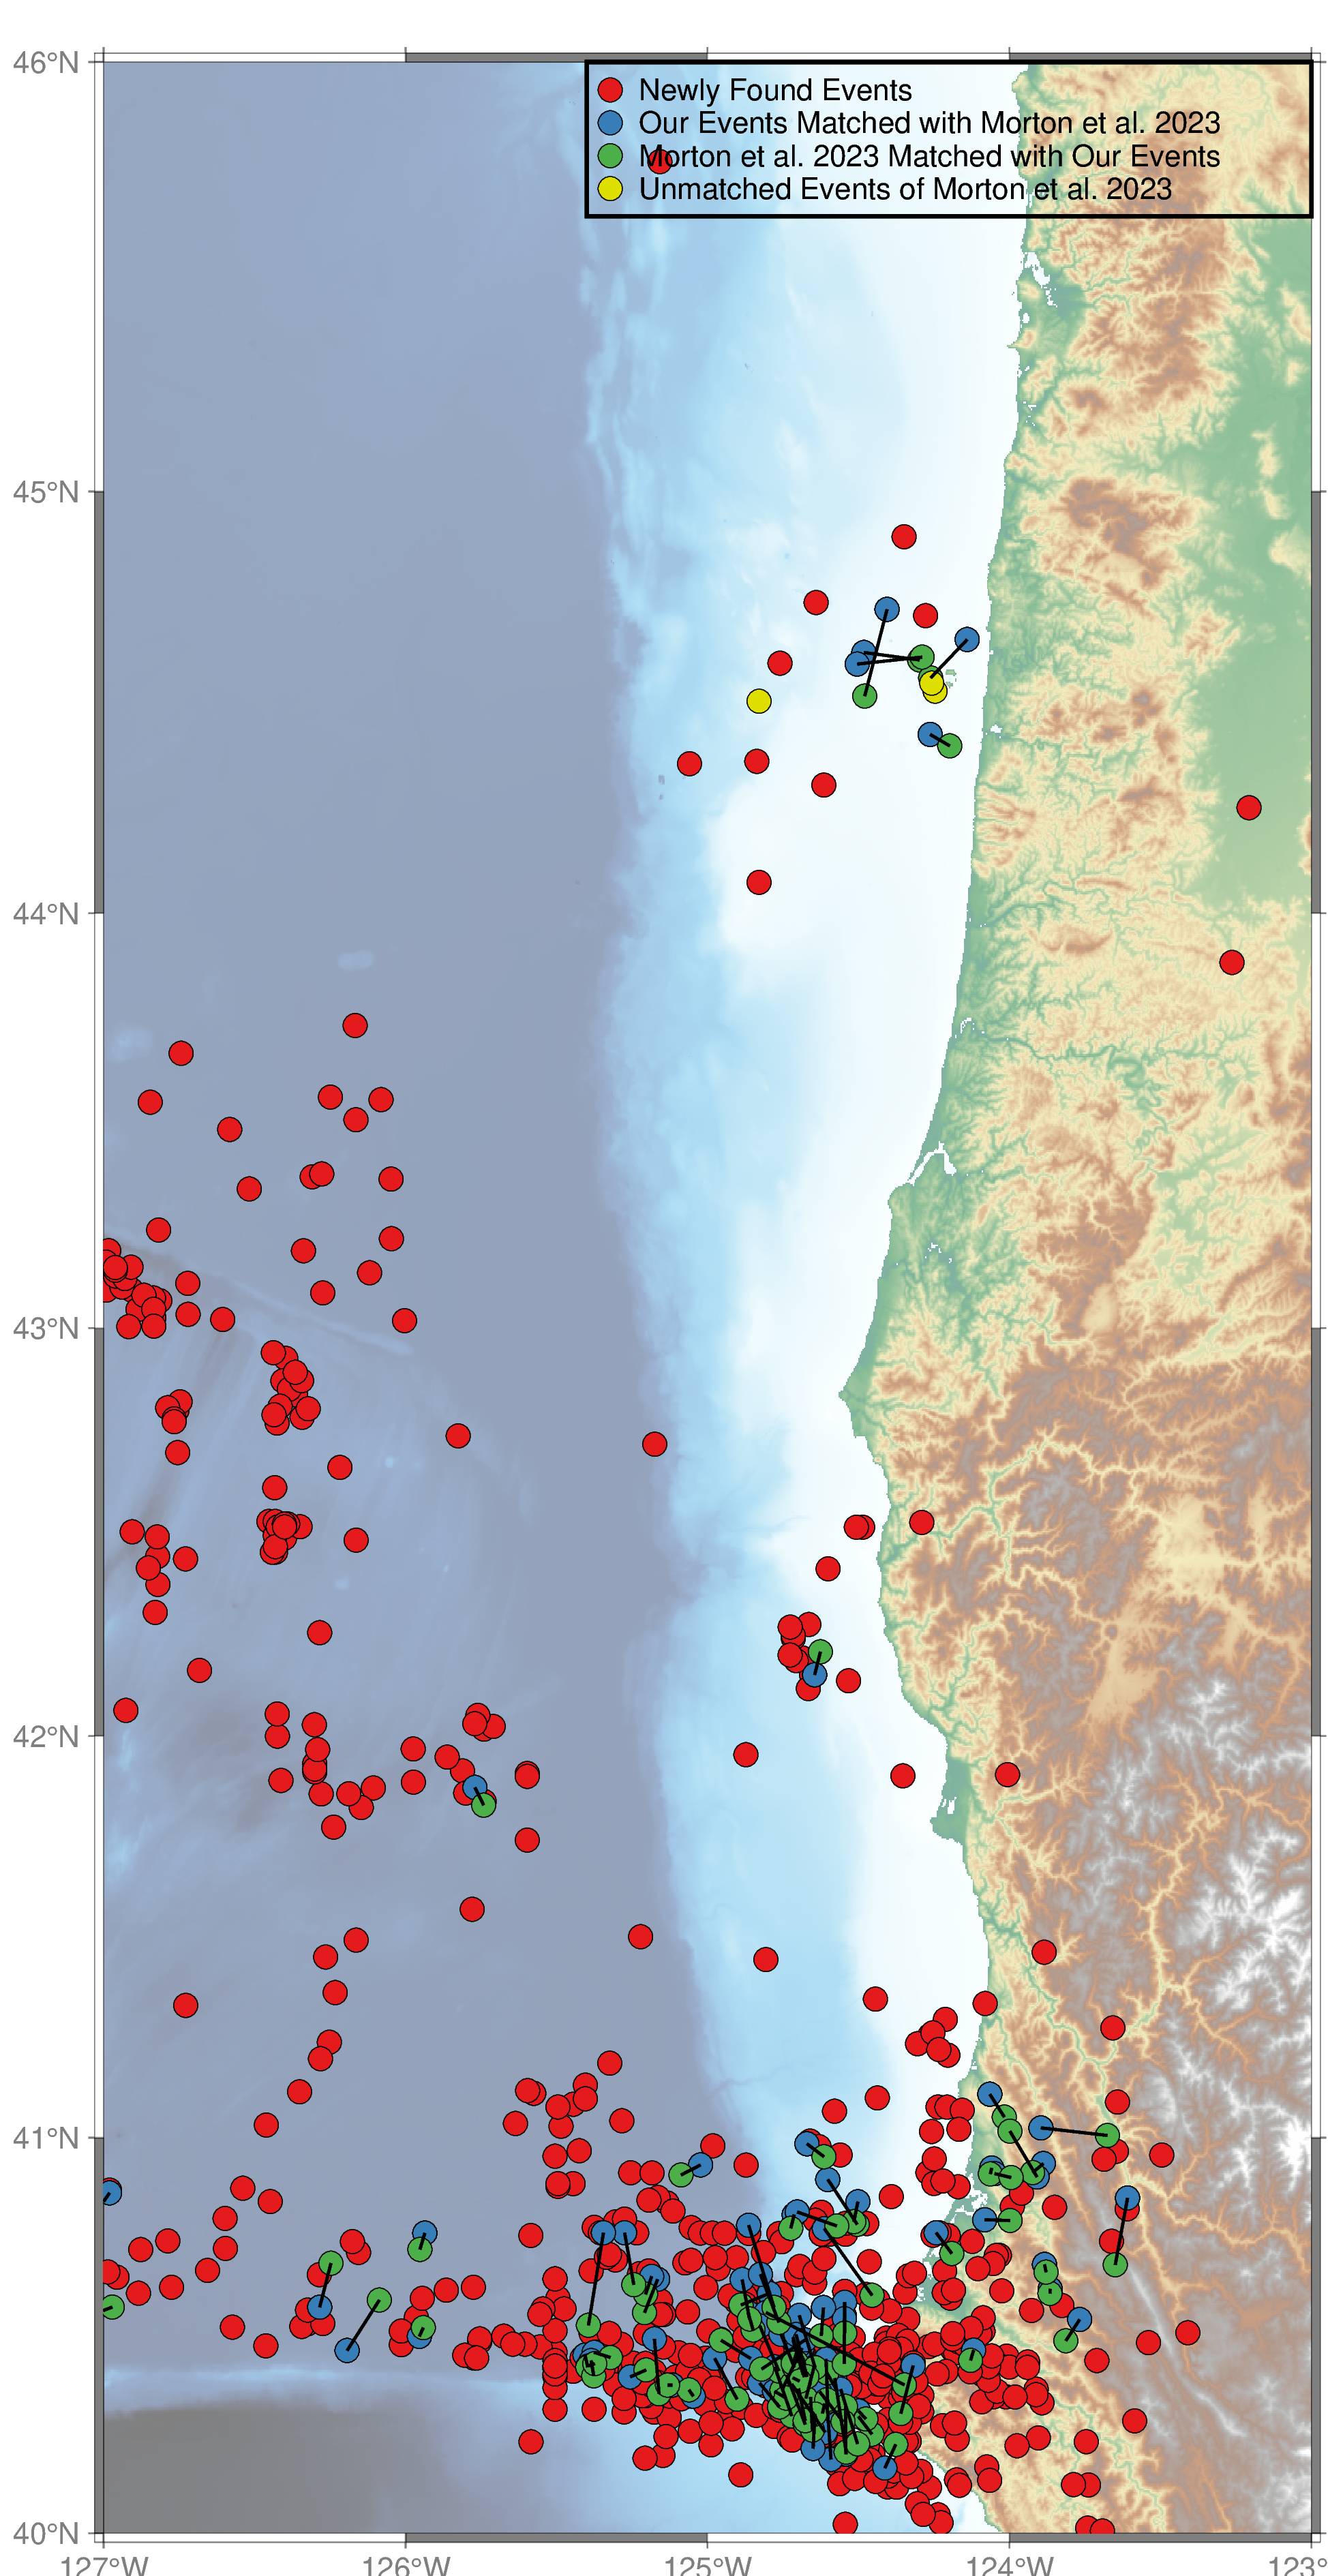

In [214]:
fig = pygmt.Figure()

# Load grid data
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=[-127, -123, 40, 50])

# Plot the grid image
fig.grdimage(grid=grid, projection="M15c", frame=['a', "+tMatched and Unmatched Events"], cmap="geo", transparency=50)

# Plotting data points
fig.plot(x=unmatched_events_mycatalog['longitude'], y=unmatched_events_mycatalog['latitude'],  
         style="c0.3c", color='#e41a1c', pen="black", label='Newly Found Events')
fig.plot(x=matched_events_mycatalog['longitude'], y=matched_events_mycatalog['latitude'],  
         style="c0.3c", color='#377eb8', pen="black", label='Our Events Matched with Morton et al. 2023')
fig.plot(x=matched_events_morton['LON'], y=matched_events_morton['LAT'],  
         style="c0.3c", color='#4daf4a', pen="black", label='Morton et al. 2023 Matched with Our Events')
fig.plot(x=unmatched_events_morton['LON'], y=unmatched_events_morton["LAT"],  
         style="c0.3c", color='#dede00', pen="black", label='Unmatched Events of Morton et al. 2023')

# Plot lines between matched events
for i in range(len(matched_events_mycatalog)):
    fig.plot(
        x=[matched_events_morton.iloc[i]['LON'], matched_events_mycatalog.iloc[i]['longitude']],
        y=[matched_events_morton.iloc[i]['LAT'], matched_events_mycatalog.iloc[i]['latitude']],
        pen="1p,black"
    )

# Add a legend to the plot
fig.legend(position="JTR+w9+jTR", box=True)

# Display the figure
fig.show()



## First map on the poster

In [135]:
t1 = pd.Timestamp('2012-10-01 00:00:00.000000+0000', tz='UTC')
t2 = pd.Timestamp('2012-10-31 23:59:59.999999+0000', tz='UTC')

## Load Data from Ian Stone's Paper

In [136]:
events_cascadia = pd.read_csv("../data/jgrb52524-sup-0003-2017jb014966-ds02.csv", header = None, skiprows = 1,
              names = ["Timestamp", "Longitude", "Latitude", "Depth (km)", "RMS (s)", "CI Year"])

# Convert epoch times to timestamps and ensure timezone awareness
events_cascadia['Time (epoch)'] = events_cascadia['Timestamp'].apply(
    lambda x: pd.Timestamp(datetime.datetime.utcfromtimestamp(x), tz='UTC'))
events_cascadia_201210 = events_cascadia.loc[(events_cascadia['Time (epoch)'] > t1) & (events_cascadia['Time (epoch)'] < t2) ]
events_cascadia_201210

Timestamp  Longitude  Latitude  Depth (km)  RMS (s)  CI Year  \
260  1349443647  -125.3283   41.1876     34.7942   0.3335        2   
261  1349482398  -126.4830   44.0203     28.5039   0.0488        2   
262  1349516866  -125.7461   41.5225      0.0000   1.7281        2   
263  1349805892  -126.0061   41.9740     25.1583   1.0203        2   
264  1350030627  -125.6299   41.0759     25.6239   0.5286        2   
265  1350559468  -125.2046   40.9325     70.0578   1.1996        2   

                 Time (epoch)  
260 2012-10-05 13:27:27+00:00  
261 2012-10-06 00:13:18+00:00  
262 2012-10-06 09:47:46+00:00  
263 2012-10-09 18:04:52+00:00  
264 2012-10-12 08:30:27+00:00  
265 2012-10-18 11:24:28+00:00

In [137]:
events_cascadia_201210_lat = events_cascadia_201210['Latitude']
events_cascadia_201210_lon = events_cascadia_201210['Longitude']

In [138]:
# Read the CSV file
events_jdf = pd.read_csv("../data/jgrb52524-sup-0002-2017jb014966-ds01.csv")

# Convert 'yyyy/mm/dd' column to Timestamp
events_jdf['yyyy/mm/dd'] = events_jdf['yyyy/mm/dd'].apply(
    lambda x: pd.Timestamp(datetime.datetime.strptime(x, "'%Y/%m/%d'"), tz='UTC'))

# Filter events based on time boundaries
events_jdf_201210 = events_jdf.loc[(events_jdf['yyyy/mm/dd'] > t1) & (events_jdf['yyyy/mm/dd'] < t2)]

# # Reset the index after filtering
# events_jdf_201210.reset_index(drop=True, inplace=True)

# Output the filtered DataFrame
events_jdf_201210

yyyy/mm/dd    hh:MM:ss.ff   Latitude   Longitude  \
57 2012-10-09 00:00:00+00:00  '11:17:43.95'  42.140000 -124.596833   
58 2012-10-10 00:00:00+00:00  '23:26:18.42'  44.595667 -124.280333   
59 2012-10-13 00:00:00+00:00  '10:11:36.78'  41.228167 -124.252500   
60 2012-10-16 00:00:00+00:00  '06:22:47.35'  42.206833 -124.649667   
61 2012-10-16 00:00:00+00:00  '11:51:43.28'  42.259667 -124.666500   
62 2012-10-17 00:00:00+00:00  '03:50:15.51'  40.966333 -124.689833   
63 2012-10-18 00:00:00+00:00  '09:25:55.67'  42.253000 -124.682167   
64 2012-10-20 00:00:00+00:00  '10:19:40.35'  42.678000 -124.725333   
65 2012-10-24 00:00:00+00:00  '02:08:17.58'  42.137000 -124.661833   
66 2012-10-27 00:00:00+00:00  '02:26:47.61'  42.246667 -124.650000   

    Depth (km)  Magnitude  # Nonzero Phase Arrivals  RMS (s)  \
57       10.54       0.97                         7     0.70   
58       21.40       1.81                        14     0.22   
59        8.98       0.83                        10     0.40   
60        7.59       2.22                        15     0.37   
61        7.23       1.01                         9     0.27   
62       30.34       2.62                        11     0.16   
63        8.90       1.67                        13     0.42   
64       16.78       0.88                         6     1.78   
65       17.46       0.74                         7     0.31   
66        6.60       0.79                         7     0.19   

    Max Azimuthal Gap  Distance to nearest station (km)  \
57                194                              29.3   
58                 95                              18.9   
59                 86                               9.9   
60                 77                              24.6   
61                168                              24.6   
62                 94                               8.7   
63                 82                              23.1   
64                243                              57.8   
65                208                              24.1   
66                163                              25.4   

    horizontal med. st. err.  vertical med. st. err.  depth fixed? (1=yes)  \
57                       4.5                     3.5                     0   
58                       0.5                     0.6                     0   
59                       1.9                     0.8                     0   
60                       0.6                     0.4                     0   
61                       1.3                     0.8                     0   
62                       0.6                     1.3                     0   
63                       0.8                     0.6                     0   
64                      23.2                    33.7                     0   
65                       2.1                    23.2                     1   
66                       2.1                     2.1                     0   

    deployment year  Land Network ID (CNSN=1) Land Network Notes  
57                2                         0          '-'   NaN  
58                2                  60462627       'PNSN'   NaN  
59                2                         0          '-'   NaN  
60                2                  60464892       'PNSN'   NaN  
61                2                         0          '-'   NaN  
62                2                  71860980       'NCSN'   NaN  
63                2                         0          '-'   NaN  
64                2                         0          '-'   NaN  
65                2                         0          '-'   NaN  
66                2                         0          '-'   NaN

In [139]:
events_jdf_201210_lat = events_cascadia_201210['Latitude']
events_jdf_201210_lon = events_cascadia_201210['Longitude']

In [164]:
events_stone_201210_lat = pd.concat([events_jdf_201210_lat, events_cascadia_201210_lat])
events_stone_201210_lon = pd.concat([events_jdf_201210_lon, events_cascadia_201210_lon])

## Load Data from Morton's Paper

In [144]:
# Read Morton's catalog
events_morton = pd.read_csv('../data/ds01.csv')
events_morton['datetime'] = pd.to_datetime(events_morton['TSTRING'], format='%Y%m%d%H%M%S', utc=True)
# Get the events in the Morton catalog that occurred on 10/14/2012

events_morton_201210= events_morton.loc[(events_morton['datetime'] > t1) & (events_morton['datetime'] < t2) ]
# Get the latitudes and longitudes for the events 
events_morton_201210_lon = events_morton_201210['LON']
events_morton_201210_lat = events_morton_201210['LAT']

In [145]:
print(len(events_morton_201210_lat),len(events_morton_201210_lon))

91 91


## Load data from the USGS catalog

In [142]:
# USGS catalog
client = Client("USGS")
# client_waveforms = WaveformClient()
events_USGS_201210 = client.get_events(starttime = UTCDateTime("2012-10-01T00:00:00.000000"),
                  endtime   = UTCDateTime("2012-10-31T23:59:59.999999"),
                  minlatitude=40,minlongitude=-127,maxlatitude=50,maxlongitude=-123)
events_USGS_201210

88 Event(s) in Catalog:
2012-10-31T15:29:52.780000Z | +40.974, -123.700 | 3.21 mw | manual
2012-10-29T16:13:12.370000Z | +48.249, -123.156 | 0.57 md | manual
...
2012-10-02T02:56:59.840000Z | +40.329, -125.431 | 2.78 md | manual
2012-10-02T02:37:36.170000Z | +40.324, -125.394 | 2.79 md | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [143]:
# Extract latitudes
events_USGS_201210_lat = []
events_USGS_201210_lon =[]
for event in events_USGS:

    origin = event.origins[0] 
    if origin:
        events_USGS_201210_lat.append(origin.latitude)
        events_USGS_201210_lon.append(origin.longitude)

In [128]:
print(len(events_USGS_201210_lat),len(events_USGS_201210_lon))

88 88


## Load Station Information

In [217]:
available_stations = [['7D', 'FS01B'],
 ['7D', 'FS02B'],
 ['7D', 'FS03B'],
 ['7D', 'FS04B'],
 ['7D', 'FS05B'],
 ['7D', 'FS06B'],
 ['7D', 'FS07B'],
 ['7D', 'FS08B'],
 ['7D', 'FS09B'],
 ['7D', 'FS10B'],
 ['7D', 'FS11B'],
 ['7D', 'FS12B'],
 ['7D', 'FS13B'],
 ['7D', 'FS14B'],
 ['7D', 'FS15B'],
 ['7D', 'FS16B'],
 ['7D', 'FS17B'],
 ['7D', 'FS18B'],
 ['7D', 'FS19B'],
 ['7D', 'FS20B'],
 ['7D', 'G02B'],
 ['7D', 'G03B'],
 ['7D', 'G03D'],
 ['7D', 'G04B'],
 ['7D', 'G09B'],
 ['7D', 'G10B'],
 ['7D', 'G11B'],
 ['7D', 'G17B'],
 ['7D', 'G18B'],
 ['7D', 'G19B'],
 ['7D', 'G20B'],
 ['7D', 'G25B'],
 ['7D', 'G26B'],
 ['7D', 'G27B'],
 ['7D', 'G28B'],
 ['7D', 'G33B'],
 ['7D', 'G34B'],
 ['7D', 'G35B'],
 ['7D', 'G36B2'],
 ['7D', 'J09B'],
 ['7D', 'J10B'],
 ['7D', 'J11B'],
 ['7D', 'J17B'],
 ['7D', 'J18B'],
 ['7D', 'J19B'],
 ['7D', 'J25B'],
 ['7D', 'J27B'],
 ['7D', 'J33B'],
 ['7D', 'M09B'],
 ['7D', 'M10B'],
 ['7D', 'M11B'],
 ['7D', 'M12B'],
 ['7D', 'M13B'],
 ['7D', 'M14B'],
 ['7D', 'M18B'],
 ['BK', 'JCC'],
 ['CN', 'BTB'],
 ['CN', 'LZB'],
 ['CN', 'MGB'],
 ['CN', 'NLLB'],
 ['CN', 'OZB'],
 ['CN', 'PFB'],
 ['CN', 'PGC'],
 ['CN', 'SHB'],
 ['CN', 'SNB'],
 ['CN', 'VGZ'],
 ['CN', 'YOUB'],
 ['NC', 'KBO'],
 ['NC', 'KCT'],
 ['NC', 'KEB'],
 ['NC', 'KHBB'],
 ['NC', 'KHMB'],
 ['NC', 'KMPB'],
 ['NC', 'KMR'],
 ['NC', 'KRMB'],
 ['NC', 'KRP'],
 ['NC', 'KSXB'],
 ['NV', 'NC89'],
 ['NV', 'NCBC'],
 ['TA', 'D03D'],
 ['TA', 'F04D'],
 ['TA', 'G03D'],
 ['TA', 'I02D'],
 ['TA', 'I03D'],
 ['TA', 'J01D'],
 ['TA', 'J01E'],
 ['TA', 'K02D'],
 ['TA', 'L02D'],
 ['TA', 'L02E'],
 ['UO', 'DBO'],
 ['UW', 'BABR'],
 ['UW', 'FISH'],
 ['UW', 'FORK'],
 ['UW', 'JEDS'],
 ['UW', 'LEBA'],
 ['UW', 'LRIV'],
 ['UW', 'OFR'],
 ['UW', 'RADR'],
 ['UW', 'TAKO'],
 ['UW', 'WISH'],
 ['X9', 'BB030'],
 ['X9', 'BB060'],
 ['X9', 'BB070'],
 ['X9', 'BB090']]

In [235]:
# Obtain the latitudes of longitude of the stations used
client = Client("IRIS")

sta_7D_lat = []
sta_7D_lon = []
other_sta_lat = []
other_sta_lon = []
for network, station in available_stations:

    # Fetch the station inventory
    inventory = client.get_stations(network=network, station=station, level='station')

    # The correct path to access the station's latitude and longitude
    sta_lat = inventory[0][0].latitude
    sta_lon = inventory[0][0].longitude

    # Check if the station belongs to network '7D'
    if network == '7D':
        sta_7D_lat.append(sta_lat)
        sta_7D_lon.append(sta_lon)
    else:
        other_sta_lat.append(sta_lat)
        other_sta_lon.append(sta_lon)



In [236]:
len(sta_7D_lat), len(other_sta_lat)

(55, 49)

## Plot the events

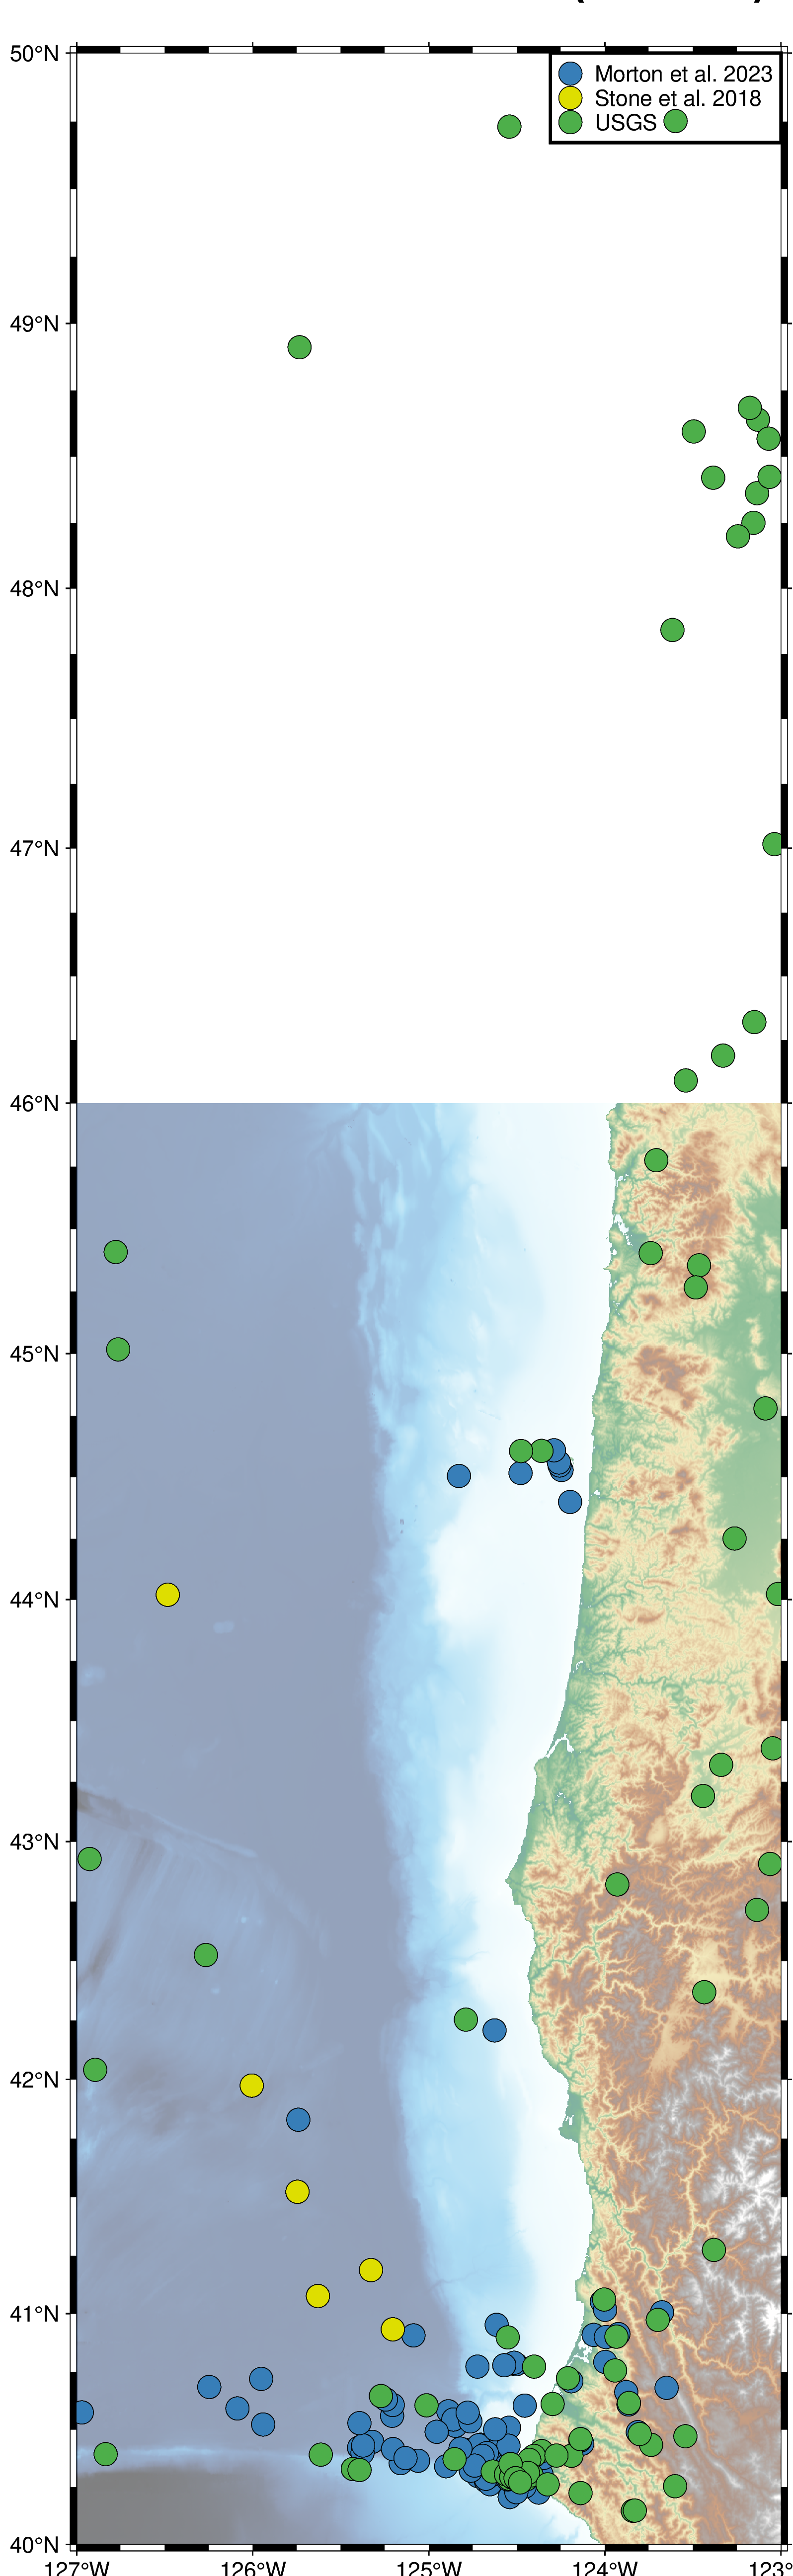

In [239]:
import pygmt

fig = pygmt.Figure()

# Define target region
region = [-127, -123, 40, 50]
title = "Main roads of O`ahu (Hawai`i)"  # Approximating the Okina letter ʻ with `
fig.basemap(region=region, projection="M12c", frame=["af", f"WSne+t{title}"])
fig.grdimage(grid=grid, cmap="geo", transparency=50)

# Adjust plot calls to use 'style' correctly
fig.plot(x=events_morton_201210_lon, y=events_morton_201210_lat,  
         fill='#377eb8', style="c0.4c", pen="black", label="Morton et al. 2023")
fig.plot(x=events_stone_201210_lon, y=events_stone_201210_lat,  
         fill='#dede00', style="c0.4c", pen="black", label="Stone et al. 2018")
fig.plot(x=events_USGS_201210_lon, y=events_USGS_201210_lat,  
         fill='#4daf4a', style="c0.4c", pen="black", label="USGS")
# fig.plot(x=sta_7D_lon, y=sta_7D_lat,  
#          fill='black', style="c0.4c", pen="black", label="7D Stations")
# fig.plot(x=other_sta_lon, y=other_sta_lat,  
#          fill='black', style="c0.4c", pen="black", label="7D Stations")

# Add a legend to the plot
fig.legend(position="JTR+jTR", box=True)  

# Show the figure
fig.show()

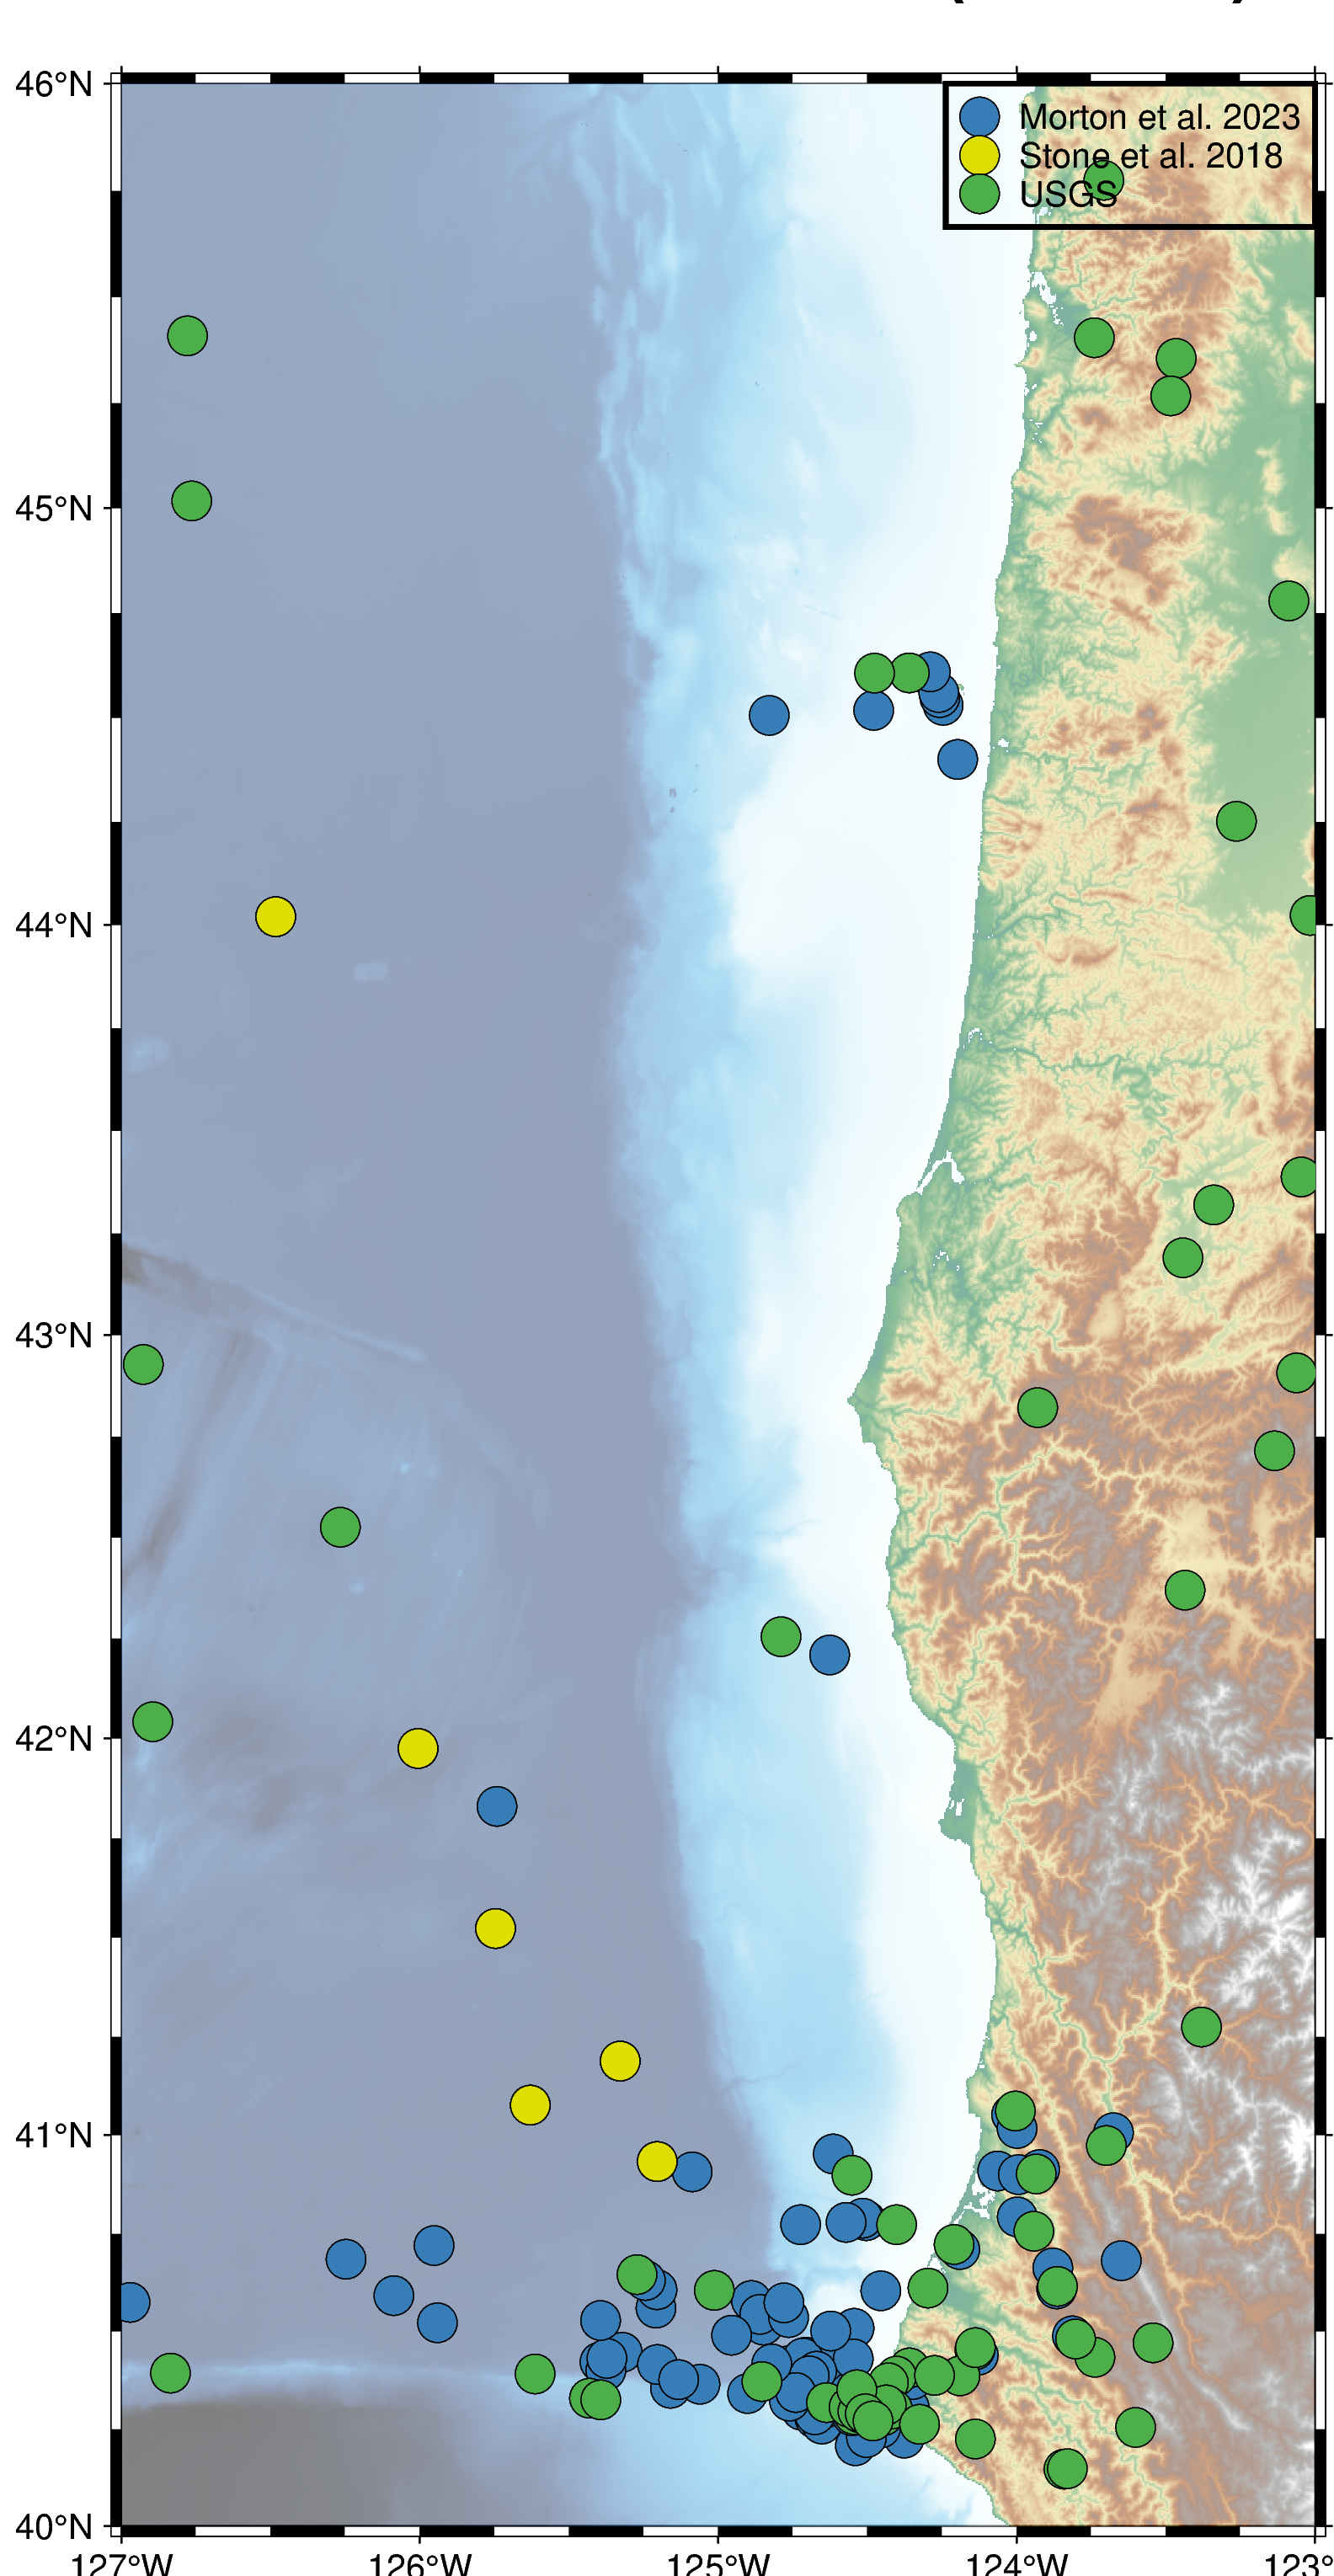

In [215]:
import pygmt

fig = pygmt.Figure()

# Define target region
region = [-127, -123, 40, 46]
title = "Main roads of O`ahu (Hawai`i)"  # Approximating the Okina letter ʻ with `
fig.basemap(region=region, projection="M12c", frame=["af", f"WSne+t{title}"])
fig.grdimage(grid=grid, cmap="geo", transparency=50)

# Adjust plot calls to use 'style' correctly
fig.plot(x=events_morton_201210_lon, y=events_morton_201210_lat,  
         fill='#377eb8', style="c0.4c", pen="black", label="Morton et al. 2023")
fig.plot(x=events_stone_201210_lon, y=events_stone_201210_lat,  
         fill='#dede00', style="c0.4c", pen="black", label="Stone et al. 2018")
fig.plot(x=events_USGS_201210_lon, y=events_USGS_201210_lat,  
         fill='#4daf4a', style="c0.4c", pen="black", label="USGS")

# Add a legend to the plot
fig.legend(position="JTR+jTR", box=True)  

# Show the figure
fig.show()